## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
iris_df = pd.read_csv("Iris.csv")

In [ ]:
# Check dimension of data

In [3]:
print(iris_df.shape)
print(iris_df.size)

(152, 6)
912


In [ ]:
#Check data Type

In [4]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# Check for NaN/Null values
print("checking NaN values\n",iris_df.isna().sum())
print("checking Null values\n",iris_df.isnull().sum())

checking NaN values
 Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64
checking Null values
 Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [7]:
print(iris_df.isnull().sum())
iris_data = iris_df.replace(np.nan,iris_df.mean())
print(iris_data.isna().sum())

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
print(iris_data.isna().sum())
Y = iris_data['Species']
X = iris_data.drop(columns=['Species'])

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
#Check the dataset
print(Y)
print(X)
print(Y.shape)
print(X.shape)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [11]:
## Target Variable Frequency Distribution
freq = Y.value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Species,count,prop
0,Iris-virginica,52,0.342105
1,Iris-setosa,50,0.328947
2,Iris-versicolor,50,0.328947


### Plot the distribution of target variable using histogram

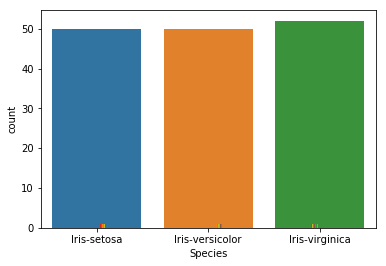

In [12]:
import seaborn as sns
sns.countplot(Y)
plt.hist(Y,histtype='bar')
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


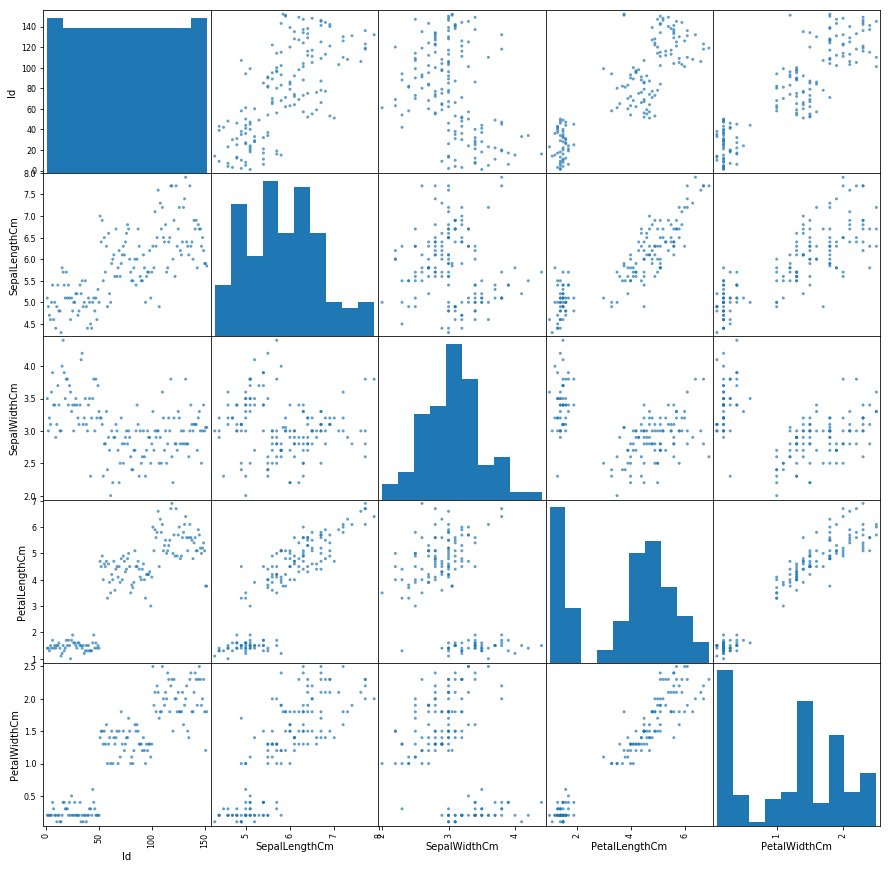

In [13]:
pd.scatter_matrix(iris_data,alpha=0.7,figsize=(15,15))
plt.show()

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [14]:
iris_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,152,NaN,NaN,NaN,76.5,44.0227,1,38.75,76.5,114.25,152
SepalLengthCm,152,NaN,NaN,NaN,5.84371,0.822577,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,152,NaN,NaN,NaN,3.054,0.430713,2,2.8,3,3.3,4.4
PetalLengthCm,152,NaN,NaN,NaN,3.75867,1.7527,1,1.6,4.3,5.1,6.9
PetalWidthCm,152,NaN,NaN,NaN,1.20265,0.759657,0.1,0.3,1.3,1.8,2.5
Species,152,3,Iris-virginica,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ID is a unique identifier and the numerical value doesnot add any value so dropping t would be a better idea
# Species is a Categorical variable and has 3 categories in which the data spans

In [16]:
#Drop Id variable from data
print("the shape of X before dropping ID column",X.shape)
X = X.drop(columns='Id')
print(X.shape)
print(X.isna().sum())

the shape of X before dropping ID column (152, 5)
(152, 4)
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


### Correlation among all variables and give your insights (1 Marks)

In [17]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
corr = X.corr()
corr
# There is not much collinearity between the variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [18]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state = 100)

### Do Feature Scaling ( 1 Marks)

In [19]:
# Use StandardScaler or similar methods
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)



StandardScaler(copy=True, with_mean=True, with_std=True)
[5.84380165 3.03515702 3.79717906 1.2215095 ]


### Train and Fit NaiveBayes Model(2 Marks)

In [20]:
#Fit the model
clf = GaussianNB()
GNB = clf.fit(X_train, y_train)
print(GNB)

GaussianNB(priors=None)


In [21]:
#Predict
from sklearn import metrics
# y_predict1 = GNB.predict(X_train)
y_predict = GNB.predict(X_test)
print(y_predict)
print(GNB.score(X_train,y_train))
print(GNB.score(X_test,y_predict))

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']
0.9504132231404959
1.0


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [ ]:
# show Confusion Matrix

In [22]:
conf_mat = metrics.confusion_matrix(y_test, y_predict)
print(conf_mat)

[[12  0  0]
 [ 0  7  0]
 [ 0  3  9]]


In [23]:
# show accuracy
# show accuracy
GNB.score(X_train,y_train)

0.9504132231404959

In [24]:

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict, average='macro') 

(0.9, 0.9166666666666666, 0.8935574229691876, None)

In [ ]:
#Show precision and Recall metrics

In [25]:
true_pos = np.diag(conf_mat) 
precision = np.sum(true_pos / np.sum(conf_mat, axis=0))
recall = np.sum(true_pos / np.sum(conf_mat, axis=1))
print(recall)
print(precision)

2.75
2.7


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [1]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [27]:
reload_df = pd.read_csv('iris.csv')
reload_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [29]:
reload_df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [33]:

reload_df = reload_df.replace(np.nan,reload_df.mean())
print(reload_df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [34]:
import sklearn as sk
from  sklearn import preprocessing
#LabelEncoder
cat_val = reload_df.select_dtypes(exclude='number')
labelencoder = preprocessing.LabelEncoder()
for col in cat_val.columns:
    #print(col)
    reload_df[col] = labelencoder.fit_transform(reload_df[col])
reload_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [35]:
reload_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.703344,-0.389905,0.865382,0.889288,0.942753
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.942753,0.775490,-0.415367,0.939813,0.951545,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [37]:
Y = reload_df['Species']
X = reload_df.drop(columns='Species')

In [39]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Species ~ SepalLengthCm +  SepalWidthCm 
        + PetalLengthCm + PetalWidthCm """,reload_df)
vif     

,Variable,VIF
0,Intercept,132.6
1,SepalLengthCm,7.0
2,SepalWidthCm,2.1
3,PetalLengthCm,29.9
4,PetalWidthCm,15.2


## Question 6

*Plot the scatter matrix for all the variables.*

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


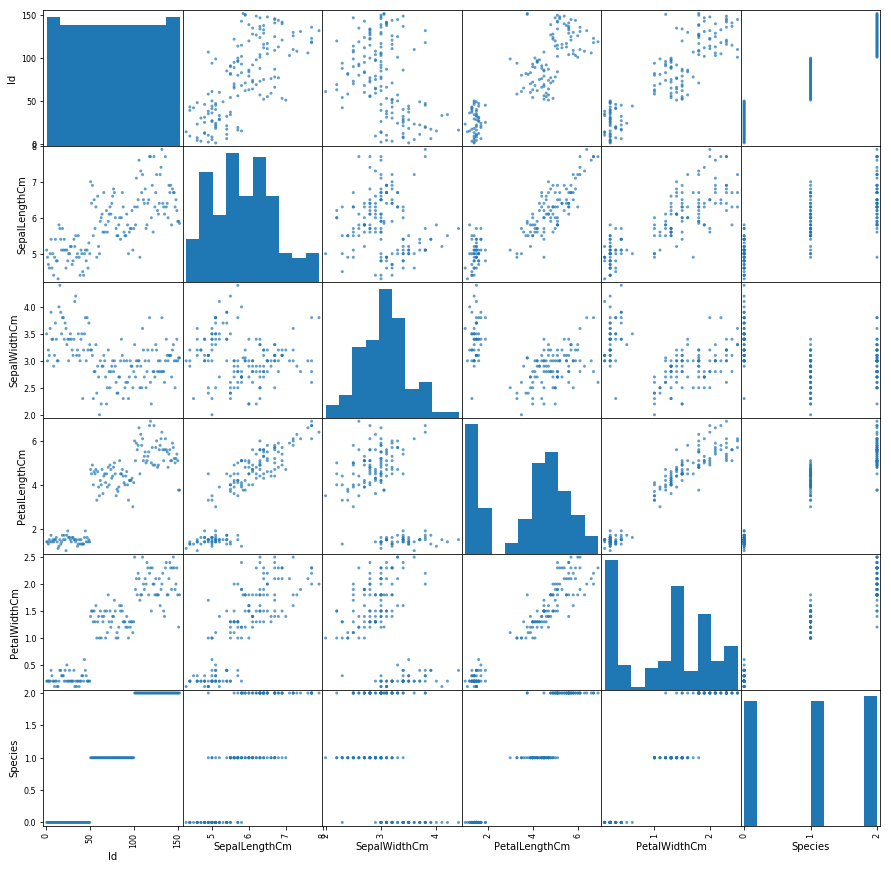

In [41]:
pd.scatter_matrix(reload_df,alpha=0.7,figsize=(15,15))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state = 100)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
# rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , 3 , 'is:', error)

RMSE value for k=  3 is: 0.0


In [45]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
# rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , 5 , 'is:', error)
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
print(pred.dtype)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
# rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , 9 , 'is:', error)

RMSE value for k=  5 is: 0.050800050800076185
float64
RMSE value for k=  9 is: 0.10369516947304253


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred.round(),normalize=False)


31

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
K_val = []
# print("K v alues",K_val)
# empty list that will hold cv scores
cv_scores = []
accuracy = []
# perform 10-fold cross validation
for k in neighbors:
    K_val.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(cv_scores)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
print(K_val)

[1.0]
1.0
[1.0, 1.0]
1.0
[1.0, 1.0, 1.0]
1.0
[1.0, 1.0, 1.0, 1.0]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666]
1.0
[1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 1.0]
1.0
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [48]:
MSE = (1 -(np.array( cv_scores, dtype=float )))
print("lowest cvscore",min(cv_scores))
print("highest cvscore",max(cv_scores))

print("lowest MSE score is  ",MSE.min())
print("highest MSE score is  ",MSE.max())

# print(c)
# MSE = []
# MSE = 1-c
# print(MSE)

lowest cvscore 0.9916666666666666
highest cvscore 1.0
lowest MSE score is   0.0
highest MSE score is   0.008333333333333415


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

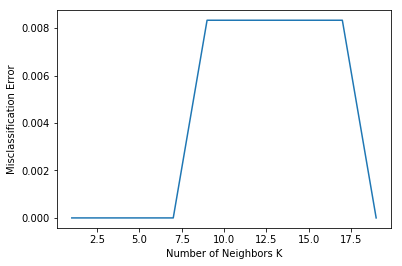

In [49]:

# plot misclassification error vs k
plt.plot(K_val, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()